# **MINDMONITOR EEG ANALYSIS FOR SEIZURE IDENTIFICATION USING DEEP LEARNING**

In [ ]:
import tensorflow as tf

# Import Library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import dataset

In [ ]:
Data1 = pd.read_csv("/content/drive/MyDrive/Project-3_Dataset/EEG_Dataset-1.csv")
Data2 = pd.read_csv("/content/drive/MyDrive/Project-3_Dataset/EEG_Dataset-2.csv")

# Statistics property of dataset

In [ ]:
Data1.head(5)

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
Data1.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,...,5999.00000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000
mean,-9.846808,-9.453076,-9.762627,-10.219870,-10.541257,-10.108851,-9.364894,-8.700783,-7.931489,-7.242374,...,-11.33939,-12.626604,-13.495249,-13.765794,-12.734122,-11.946658,-11.555426,-11.586931,-11.967161,2.996666
std,165.943754,166.722745,164.038366,160.989677,160.065449,159.762113,158.927158,158.554358,156.956044,155.737648,...,162.97870,163.206928,165.263802,165.977664,166.489394,165.193110,164.091303,165.179994,168.104148,1.406881
min,-1741.000000,-1615.000000,-1741.000000,-1630.000000,-1755.000000,-1757.000000,-1832.000000,-1778.000000,-1840.000000,-1592.000000,...,-1867.00000,-1865.000000,-1642.000000,-1723.000000,-1620.000000,-1642.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.500000,-56.000000,-56.000000,-55.000000,...,-54.00000,-55.000000,-56.000000,-57.000000,-56.000000,-56.000000,-56.000000,-54.000000,-56.000000,2.000000
50%,-8.000000,-8.000000,-8.000000,-8.000000,-9.000000,-10.000000,-9.000000,-9.000000,-9.000000,-8.000000,...,-8.00000,-9.000000,-10.000000,-10.000000,-10.000000,-9.000000,-8.000000,-9.000000,-9.000000,3.000000
75%,35.000000,36.000000,36.000000,35.000000,34.000000,34.000000,35.000000,35.000000,35.500000,35.000000,...,34.00000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,35.000000,34.000000,4.000000
max,1291.000000,1356.000000,1274.000000,1167.000000,1244.000000,1244.000000,1310.000000,1238.000000,1381.000000,1502.000000,...,1419.00000,1306.000000,1124.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


# **Preprocessing**

In [ ]:
Data1.dropna(inplace=True)
Data2.dropna(inplace=True)

In [ ]:
# Data.drop(columns='Unnamed', inplace=True)

In [ ]:
Data1 = Data1.iloc[:,1:]
Data2 = Data2.iloc[:,1:]

In [ ]:
Data1.fillna(Data1.mean(), inplace=True)
Data2.fillna(Data2.mean(), inplace=True)

# Remove the unnecessary features and assign to (X1) , labels to (y1)


In [ ]:
X1 = Data1.iloc[:,:-1]
X2 = Data2.iloc[:,:-1]

In [ ]:
y1 = Data1.iloc[:,-1]
y2 = Data2.iloc[:,-1]

# **Filters**

In [ ]:
from scipy.ndimage import gaussian_filter
from scipy.signal import butter, filtfilt
from scipy.signal import cheby1, filtfilt, bessel
from scipy.signal import wiener
from scipy.signal import butter, filtfilt
import pywt

# Gaussian Butterworth filter

In [ ]:
def apply_gaussian_filter(data, sigma):
    filtered_data = gaussian_filter(data, sigma=sigma)
    return filtered_data

def apply_butter_lowpass_filter(data, cutoff_freq, sampling_freq, order=5):
    nyquist_freq = 0.5 * sampling_freq
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

def calculate_snr(original_signal, noisy_signal):
    noise = original_signal - noisy_signal
    snr = 10 * np.log10(np.sum(original_signal**2) / np.sum(noise**2))
    return snr

In [ ]:
sigma = 2.0

In [ ]:
filtered_data_gaussian = apply_gaussian_filter(X1, sigma)

In [ ]:
cutoff_freq = 60
sampling_freq = 256
order = 2

In [ ]:
filtered_data_butter = apply_butter_lowpass_filter(X1, cutoff_freq, sampling_freq, order)

In [ ]:
combined_filtered_data = (filtered_data_gaussian + filtered_data_butter) / 2

In [ ]:
overall_snr_combined1 = calculate_snr(np.ravel(X1), np.ravel(combined_filtered_data))

In [ ]:
print("\nOverall Signal-to-Noise Ratio (SNR) for combined approach:")
print(f"{overall_snr_combined1:.2f} dB")


Overall Signal-to-Noise Ratio (SNR) for combined approach:
7.06 dB


# Chebyshev wavelet_denoising filter

In [ ]:
def chebyshev_lowpass(cutoff_freq, sampling_freq, ripple_db, order=5):
    nyquist_freq = 0.5 * sampling_freq
    Wn = cutoff_freq / nyquist_freq
    b, a = cheby1(order, ripple_db, Wn, btype='low', analog=False)
    return b, a

def apply_chebyshev_lowpass_filter(data, cutoff_freq, sampling_freq, ripple_db, order=5):
    b, a = chebyshev_lowpass(cutoff_freq, sampling_freq, ripple_db, order=order)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

def apply_wavelet_denoising(data, wavelet, threshold):
    coefficients = pywt.wavedec(data, wavelet)
    coefficients = [pywt.threshold(c, threshold, mode='soft') for c in coefficients]
    denoised_data = pywt.waverec(coefficients, wavelet)
    return denoised_data

def calculate_snr(original_signal, noisy_signal):
    noise = original_signal - noisy_signal
    snr = 10 * np.log10(np.sum(original_signal**2) / np.sum(noise**2))
    return snr

In [ ]:
cutoff_freq = 60
sampling_freq = 256
ripple_db = 0.5
order = 4


In [ ]:
wavelet = 'db4'
threshold = 1

In [ ]:
filtered_data_cheby = apply_chebyshev_lowpass_filter(X1, cutoff_freq, sampling_freq, ripple_db, order)

In [ ]:
denoised_data = apply_wavelet_denoising(filtered_data_cheby, wavelet, threshold)

In [ ]:
overall_snr_combined2 = calculate_snr(np.ravel(X1), np.ravel(denoised_data))

In [ ]:
print("\nOverall Signal-to-Noise Ratio (SNR) after combined filtering:")
print(f"{overall_snr_combined2:.2f} dB")


Overall Signal-to-Noise Ratio (SNR) after combined filtering:
21.22 dB


# Chebyshev Bessel Filter

In [ ]:
def apply_chebyshev_lowpass_filter(data, cutoff_freq, ripple_db, order):
    nyquist_freq = 0.5 * sampling_freq
    Wn = cutoff_freq / nyquist_freq
    b, a = cheby1(order, ripple_db, Wn, btype='low', analog=False)
    filtered_data_cheby = filtfilt(b, a, data)
    return filtered_data_cheby

def apply_bessel_lowpass_filter(data, cutoff_freq, order):
    nyquist_freq = 0.5 * sampling_freq
    Wn = cutoff_freq / nyquist_freq
    b, a = bessel(order, Wn, btype='low', analog=False)
    filtered_data_bessel = filtfilt(b, a, data)
    return filtered_data_bessel

In [ ]:
cutoff_freq_cheby = 60
ripple_db_cheby = 0.5
order_cheby = 4
order_bessel = 4

In [ ]:
filtered_data_cheby = apply_chebyshev_lowpass_filter(X1, cutoff_freq_cheby, ripple_db_cheby, order_cheby)
filtered_data_bessel = apply_bessel_lowpass_filter(X1, cutoff_freq, order_bessel)

In [ ]:
combined_filtered_data = (filtered_data_cheby + filtered_data_bessel) / 2

In [ ]:
overall_snr_combined3 = calculate_snr(np.ravel(X1), np.ravel(combined_filtered_data))


In [ ]:
print("\nOverall Signal-to-Noise Ratio (SNR) for combined approach:")
print(f"{overall_snr_combined3:.2f} dB")



Overall Signal-to-Noise Ratio (SNR) for combined approach:
22.37 dB


# Daubechies Wiener filter

In [ ]:
filtered_data_wiener = wiener(X1)

In [ ]:
wavelet = 'db4'
level = 3

In [ ]:
coefficients = pywt.wavedec(filtered_data_wiener, wavelet, level=level)
threshold = 1

In [ ]:

coefficients = [pywt.threshold(c, threshold, mode='soft') for c in coefficients]
denoised_data = pywt.waverec(coefficients, wavelet)

In [ ]:
overall_snr_combined4 = calculate_snr(np.ravel(X1), np.ravel(denoised_data))

In [ ]:
print("\nOverall Signal-to-Noise Ratio (SNR) for combined approach:")
print(f"{overall_snr_combined4:.2f} dB")


Overall Signal-to-Noise Ratio (SNR) for combined approach:
7.73 dB


# Butterworth Wavelet denoising filter

In [ ]:
def butterworth_filter(data, cutoff_freq, sampling_freq, order=5):

    nyquist_freq = 0.5 * sampling_freq
    cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

In [ ]:
def wavelet_denoising(data, wavelet='db4', level=3):

    coeffs = pywt.wavedec(data, wavelet, level=level)
    threshold = 1
    coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
    denoised_data = pywt.waverec(coeffs, wavelet)
    return denoised_data

In [ ]:
def combine_filters(data, cutoff_freq, sampling_freq, wavelet='db4', level=3, order=5):

    butter_filtered_data = butterworth_filter(data, cutoff_freq, sampling_freq, order)
    combined_filtered_data = wavelet_denoising(butter_filtered_data, wavelet, level)
    return combined_filtered_data

In [ ]:
def calculate_snr(original_signal, noisy_signal):
    noise = original_signal - noisy_signal
    snr = 10 * np.log10(np.sum(original_signal*2) / np.sum(noise*2))
    return snr

In [ ]:
cutoff_freq = 40
sampling_freq = 256
wavelet = 'db4'
level = 4
order = 5

In [ ]:
filtered_data1 = combine_filters(X1, cutoff_freq, sampling_freq, wavelet, level, order)
filtered_data2 = combine_filters(X2, cutoff_freq, sampling_freq, wavelet, level, order)

In [ ]:
overall_snr_combined51 = calculate_snr(np.ravel(X1), np.ravel(filtered_data1))
overall_snr_combined52 = calculate_snr(np.ravel(X2), np.ravel(filtered_data2))

In [ ]:
print("\nOverall Signal-to-Noise Ratio (SNR):")
print(f"{overall_snr_combined51:.2f} dB")


Overall Signal-to-Noise Ratio (SNR):
24.11 dB


In [ ]:
print("\nOverall Signal-to-Noise Ratio (SNR):")
print(f"{overall_snr_combined52:.2f} dB")


Overall Signal-to-Noise Ratio (SNR):
23.57 dB


# Visualization of filters

In [ ]:
filters = ['Gaussian Butterworth', 'Chebyshev wavelet_denoising ', 'Chebyshev Bessel ','Daubechies Wiener ','Butterworth Wavelet denoising']
snr_values = [overall_snr_combined1, overall_snr_combined2, overall_snr_combined3, overall_snr_combined4, overall_snr_combined51]
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral']

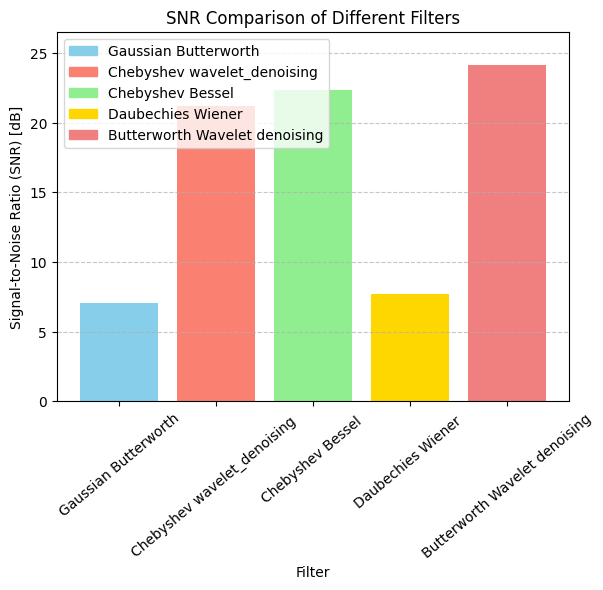

In [ ]:
bars = plt.bar(filters, snr_values, color=colors)
plt.xlabel('Filter')
plt.ylabel('Signal-to-Noise Ratio (SNR) [dB]')
plt.title('SNR Comparison of Different Filters')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(snr_values) * 1.1)

plt.xticks(rotation=40)

legend_labels = ['Gaussian Butterworth', 'Chebyshev wavelet_denoising ', 'Chebyshev Bessel ','Daubechies Wiener ','Butterworth Wavelet denoising']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, legend_labels, loc='upper left')

plt.subplots_adjust(left=0.1)

plt.show()


# Filtered data

In [ ]:
filtered_data1

array([[ 134.64937122,  192.06145019,  224.68726805, ..., -113.089676  ,
         -89.19842549,  -50.21701889],
       [ 385.08493341,  365.71296447,  353.20669322, ...,  152.24005842,
         143.74777469,  128.60331285],
       [ -32.72723057,  -36.82632357,  -38.29484437, ...,  -38.08615055,
         -40.4082585 ,  -35.32747647],
       ...,
       [ -74.62075565,  -62.24989338,  -56.37080485, ...,  -15.73532623,
         -17.56312091,  -20.34029627],
       [  18.52313185,   17.80695436,   16.11866285, ...,  -12.37342192,
           3.94211549,   25.4882227 ],
       [ 246.09165022,    9.31642213, -110.88006823, ...,  318.28073224,
         386.79932953,  415.97389996]])

In [ ]:
filtered_data1 = pd.DataFrame(filtered_data1, columns=[f'X{i}' for i in range(1, filtered_data1.shape[1] + 1)])
filtered_data1.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,134.649371,192.061450,224.687268,223.929041,187.140368,123.253556,56.315916,-0.466723,-33.493466,-36.517834,...,5.047247,-0.364494,-15.594395,-43.676949,-74.027950,-103.646829,-118.657853,-113.089676,-89.198425,-50.217019
1,385.084933,365.712964,353.206693,343.605799,331.835558,313.498007,287.174379,258.494412,245.207077,251.749524,...,163.576738,163.632665,158.476234,151.184701,148.532635,152.941568,154.242954,152.240058,143.747775,128.603313
2,-32.727231,-36.826324,-38.294844,-38.090185,-39.567054,-43.389074,-53.298378,-69.139101,-82.004986,-91.971480,...,25.574059,50.429666,59.268944,46.557196,22.955508,-6.947301,-29.546474,-38.086151,-40.408259,-35.327476
3,-103.635011,-96.942239,-93.865459,-92.643651,-93.435981,-97.402413,-97.733134,-94.352441,-88.239261,-78.553293,...,-78.089610,-80.809517,-81.799629,-80.715979,-79.667581,-78.162263,-75.831074,-72.931589,-69.306950,-64.961696
4,-8.640543,-63.459244,-96.121949,-101.176571,-79.329935,-42.292071,-14.843670,-7.309788,-25.059656,-60.062989,...,6.915764,5.737049,-0.572334,-11.411746,-27.701968,-49.673112,-66.503836,-77.442391,-79.303878,-72.669784


In [ ]:
filtered_data2 = pd.DataFrame(filtered_data2, columns=[f'X{i}' for i in range(1, filtered_data2.shape[1] + 1)])
filtered_data2.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,129.227849,138.032607,146.481934,156.406171,161.045513,158.180768,145.114998,120.366157,96.548057,77.479300,...,96.363305,96.263380,91.956883,82.722582,71.816245,57.958182,45.734974,35.769708,28.672386,26.089915
1,-592.732652,-800.801185,-1014.332046,-1213.568222,-1333.924687,-1301.369967,-1086.611795,-714.988316,-280.851645,111.713082,...,134.218489,-73.552452,-434.472456,-780.032989,-990.960047,-1032.484351,-945.274761,-783.416276,-595.125597,-402.918586
2,-31.371206,-60.477220,-76.451563,-79.719275,-71.523661,-57.193330,-48.183955,-49.082361,-57.621221,-73.001386,...,41.611606,43.669420,47.760848,54.628049,55.595206,49.887427,38.788610,22.723154,8.111171,-3.819666
3,8.653193,1.825539,-2.259491,-5.321533,-6.001217,-2.424699,2.926413,11.167920,17.906109,22.714628,...,21.776252,18.925462,16.956344,15.307578,10.170340,2.033412,-7.253565,-18.316530,-28.427169,-37.119902
4,-55.621508,-44.419883,-34.702976,-23.641831,-21.697219,-32.027897,-54.806916,-86.867759,-111.311984,-124.533129,...,60.040120,101.900653,115.995916,94.636305,50.200399,-6.797912,-53.402940,-78.134019,-84.658431,-76.158922


# Visualization of Original data




In [ ]:
eeg_columns = [f"X{i}" for i in range(1, 179)]

In [ ]:
X1[eeg_columns] = X1[eeg_columns].astype(float)

<ipython-input-56-623fce001cf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1[eeg_columns] = X1[eeg_columns].astype(float)


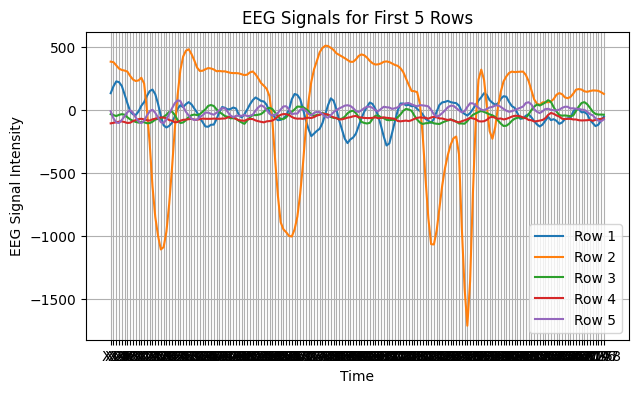

In [ ]:
plt.figure(figsize=(7, 4))
for i in range(5):
    plt.plot(X1.loc[i, eeg_columns], label=f"Row {i + 1}")

plt.xlabel('Time')
plt.ylabel('EEG Signal Intensity')
plt.title('EEG Signals for First 5 Rows')
plt.legend()
plt.grid(True)
plt.show()

# Visualization of filtered data

In [ ]:
column_names = [f'X{i}' for i in range(1, filtered_data1.shape[1] + 1)]

In [ ]:
filtered_data1[column_names] = filtered_data1[column_names].astype(float)

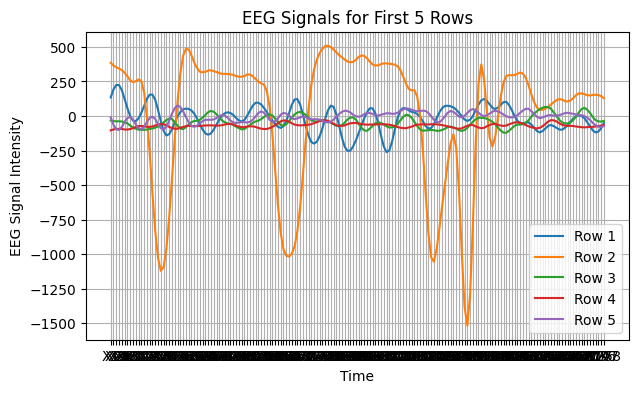

In [ ]:
plt.figure(figsize=(7, 4))
for i in range(5):
    plt.plot(filtered_data1.loc[i, eeg_columns], label=f"Row {i + 1}")

plt.xlabel('Time')
plt.ylabel('EEG Signal Intensity')
plt.title('EEG Signals for First 5 Rows')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
filtered_data1['y']= y1
filtered_data2['y']= y2

<ipython-input-61-ae98d7018482>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  filtered_data1['y']= y1


In [ ]:
filtered_data1.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,134.649371,192.061450,224.687268,223.929041,187.140368,123.253556,56.315916,-0.466723,-33.493466,-36.517834,...,-0.364494,-15.594395,-43.676949,-74.027950,-103.646829,-118.657853,-113.089676,-89.198425,-50.217019,4
1,385.084933,365.712964,353.206693,343.605799,331.835558,313.498007,287.174379,258.494412,245.207077,251.749524,...,163.632665,158.476234,151.184701,148.532635,152.941568,154.242954,152.240058,143.747775,128.603313,1
2,-32.727231,-36.826324,-38.294844,-38.090185,-39.567054,-43.389074,-53.298378,-69.139101,-82.004986,-91.971480,...,50.429666,59.268944,46.557196,22.955508,-6.947301,-29.546474,-38.086151,-40.408259,-35.327476,5
3,-103.635011,-96.942239,-93.865459,-92.643651,-93.435981,-97.402413,-97.733134,-94.352441,-88.239261,-78.553293,...,-80.809517,-81.799629,-80.715979,-79.667581,-78.162263,-75.831074,-72.931589,-69.306950,-64.961696,5
4,-8.640543,-63.459244,-96.121949,-101.176571,-79.329935,-42.292071,-14.843670,-7.309788,-25.059656,-60.062989,...,5.737049,-0.572334,-11.411746,-27.701968,-49.673112,-66.503836,-77.442391,-79.303878,-72.669784,5


# **Splitting the filtered data into features (X) and labels (y)**

In [ ]:
X3 = filtered_data1.iloc[:,0:-1].values
X4 = filtered_data2.iloc[:,0:-1].values

In [ ]:
y3 = filtered_data1.iloc[:,-1:].values
y3[y3>1] = 0

In [ ]:
y4 = filtered_data2.iloc[:,-1:].values
y4[y4>1] = 0

In [ ]:
print(X3)

[[ 134.64937122  192.06145019  224.68726805 ... -113.089676
   -89.19842549  -50.21701889]
 [ 385.08493341  365.71296447  353.20669322 ...  152.24005842
   143.74777469  128.60331285]
 [ -32.72723057  -36.82632357  -38.29484437 ...  -38.08615055
   -40.4082585   -35.32747647]
 ...
 [ -74.62075565  -62.24989338  -56.37080485 ...  -15.73532623
   -17.56312091  -20.34029627]
 [  18.52313185   17.80695436   16.11866285 ...  -12.37342192
     3.94211549   25.4882227 ]
 [ 246.09165022    9.31642213 -110.88006823 ...  318.28073224
   386.79932953  415.97389996]]


In [ ]:
print(y3)

[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [1]]


# **Implementing the Models**

In [ ]:
from tensorflow.keras import layers, models
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# *Alexnet model*

**Architecture of a model**

In [ ]:
def build_eeg_alexnet(input_shape, num_classes):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv1D(96, kernel_size=11, strides=4, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(pool_size=3, strides=2))
    model.add(layers.Conv1D(256, kernel_size=5, padding='same', activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=3, strides=2))
    model.add(layers.Conv1D(384, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.Conv1D(384, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.Conv1D(256, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=3, strides=2))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

 **Splitting the Dataset into Training and Test Sets**

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X3, y3, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

 **Reshaping for alexnet model**

In [ ]:
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

**initialization of a parameter**

In [ ]:
input_shape = (178, 1)
num_classes = 2

**Compilation and fiting of a model**

In [ ]:
eeg_alexnet = build_eeg_alexnet(input_shape, num_classes)

In [ ]:
eeg_alexnet.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
history_alexnet = eeg_alexnet.fit(X_train, y_train,
                           epochs=5,
                           validation_data=(X_val, y_val))

Epoch 1/5
150/150 [==============================] - 62s 395ms/step - loss: 1.2652 - accuracy: 0.9021 - val_loss: 0.0808 - val_accuracy: 0.9683
Epoch 2/5
150/150 [==============================] - 53s 354ms/step - loss: 0.0931 - accuracy: 0.9710 - val_loss: 0.0783 - val_accuracy: 0.9750
Epoch 3/5
150/150 [==============================] - 52s 349ms/step - loss: 0.0835 - accuracy: 0.9708 - val_loss: 0.1164 - val_accuracy: 0.9617
Epoch 4/5
150/150 [==============================] - 53s 353ms/step - loss: 0.0698 - accuracy: 0.9758 - val_loss: 0.0766 - val_accuracy: 0.9683
Epoch 5/5
150/150 [==============================] - 52s 347ms/step - loss: 0.0715 - accuracy: 0.9765 - val_loss: 0.0810 - val_accuracy: 0.9700


**Performance metrics**

In [ ]:
test_loss, accuracy_alexnet = eeg_alexnet.evaluate(X_test, y_test)
print('Test accuracy:', accuracy_alexnet)

19/19 [==============================] - 1s 48ms/step - loss: 0.0465 - accuracy: 0.9783
Test accuracy: 0.9783333539962769


In [ ]:
train_losses_alexnet = history_alexnet.history['loss']

In [ ]:
y_pred_alexnet = eeg_alexnet.predict(X_test)

19/19 [==============================] - 1s 33ms/step


In [ ]:
y_pred_labels_alexnet = np.argmax(y_pred_alexnet, axis=1)

In [ ]:
precision_alexnet = precision_score(y_test, y_pred_labels_alexnet, average='weighted')
print("Precision (AlexNet):", precision_alexnet)

Precision (AlexNet): 0.9782244664934248


In [ ]:
recall_alexnet = recall_score(y_test, y_pred_labels_alexnet, average='weighted')
print("Recall (AlexNet):", recall_alexnet)

Recall (AlexNet): 0.9783333333333334


In [ ]:
f1_score_alexnet = f1_score(y_test, y_pred_labels_alexnet, average='weighted')
print("F1-score (AlexNet):", f1_score_alexnet)

F1-score (AlexNet): 0.9780506104271793


# *Densenet model*

**Architecture of a model**

In [ ]:
def denseBlock(dims,inp) :
    x = tf.keras.layers.BatchNormalization() (inp)
    x = tf.keras.layers.Dense(dims,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    x = tf.keras.layers.Dropout(0.4) (x)
    x = tf.keras.layers.Dense(dims,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    x = tf.keras.layers.Dropout(0.4) (x)
    x = tf.keras.layers.Dense(dims,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    x = tf.keras.layers.Dropout(0.4) (x)
    x = tf.keras.layers.Dense(178,activation=tf.keras.layers.LeakyReLU(0.2)) (x)
    return x

In [ ]:
inp = tf.keras.layers.Input(shape=(178,),name='input')

In [ ]:
x1 = denseBlock(256,inp)
x2 = denseBlock(512,inp)
x3 = denseBlock(1024,inp)

In [ ]:
x = tf.keras.layers.Concatenate()([x1,x2,x3])
x = tf.keras.layers.Dense(128,activation=tf.keras.layers.LeakyReLU(0.2)) (x)

In [ ]:
out = tf.keras.layers.Dense(1,activation='sigmoid',name='output') (x)

In [ ]:
eeg_densenet_model = tf.keras.models.Model(inp,out)

In [ ]:
eeg_densenet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 178)]                0         []                            
                                                                                                  
 batch_normalization (Batch  (None, 178)                  712       ['input[0][0]']               
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_1 (Bat  (None, 178)                  712       ['input[0][0]']               
 chNormalization)                                                                                 
                                                                                              

 **Splitting the Dataset into Training and Test Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3,y3,test_size=0.25,shuffle=True)
X_train.shape,y_test.shape

((4499, 178), (1500, 1))

**Model visualization**

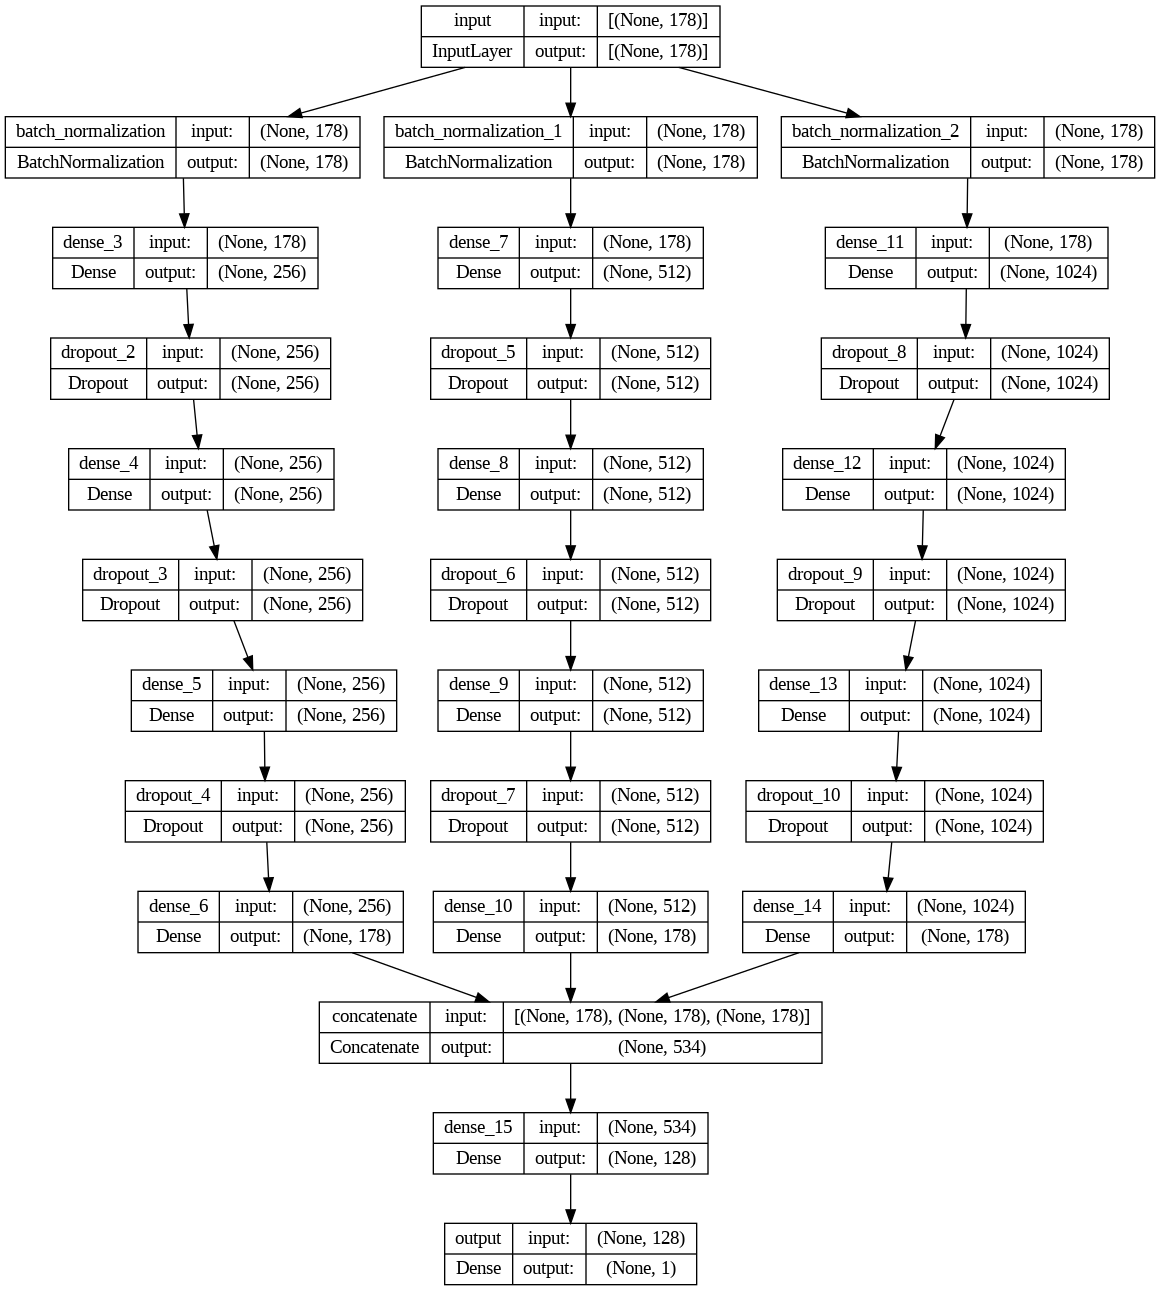

In [ ]:
tf.keras.utils.plot_model(eeg_densenet_model,show_shapes=True)

**Compilation and fiting of a model**

In [ ]:
eeg_densenet_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])
history_densenet = eeg_densenet_model.fit(X_train,y_train,epochs=50,batch_size=128,validation_split=0.2)

Epoch 1/50
29/29 [==============================] - 5s 76ms/step - loss: 0.6696 - accuracy: 0.6052 - val_loss: 0.5860 - val_accuracy: 0.8144
Epoch 2/50
29/29 [==============================] - 2s 66ms/step - loss: 0.5738 - accuracy: 0.8244 - val_loss: 0.4556 - val_accuracy: 0.8911
Epoch 3/50
29/29 [==============================] - 2s 75ms/step - loss: 0.4519 - accuracy: 0.8916 - val_loss: 0.3481 - val_accuracy: 0.9233
Epoch 4/50
29/29 [==============================] - 2s 78ms/step - loss: 0.3316 - accuracy: 0.9194 - val_loss: 0.2455 - val_accuracy: 0.9478
Epoch 5/50
29/29 [==============================] - 2s 66ms/step - loss: 0.2614 - accuracy: 0.9364 - val_loss: 0.2180 - val_accuracy: 0.9489
Epoch 6/50
29/29 [==============================] - 2s 66ms/step - loss: 0.2057 - accuracy: 0.9469 - val_loss: 0.1579 - val_accuracy: 0.9622
Epoch 7/50
29/29 [==============================] - 2s 65ms/step - loss: 0.1717 - accuracy: 0.9539 - val_loss: 0.1462 - val_accuracy: 0.9622
Epoch 8/50
29

**Perfromance metrics**

In [ ]:
loss1, accuracy_densenet = eeg_densenet_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss1}, Test Accuracy: {accuracy_densenet}')

47/47 [==============================] - 0s 6ms/step - loss: 0.1390 - accuracy: 0.9613
Test Loss: 0.1390385776758194, Test Accuracy: 0.9613333344459534


In [ ]:
predictions1 = eeg_densenet_model.predict(X_test)

47/47 [==============================] - 0s 6ms/step


In [ ]:
binary_predictions1 = (predictions1 > 0.5).astype('int32')

In [ ]:
precision_densenet = precision_score(y_test, binary_predictions1)
print("Precision:", precision_densenet)

Precision: 0.9832635983263598


In [ ]:
f1_score_densenet = f1_score(y_test, binary_predictions1)
print("F1 Score:", f1_score_densenet)

F1 Score: 0.8901515151515151


In [ ]:
recall_densenet = recall_score(y_test, binary_predictions1)
print("Recall:", recall_densenet)

Recall: 0.8131487889273357


# *Googlenet model*

**Architecture of a model**

In [ ]:
def inception_module(x, filters):
    # 1x1 convolution branch
    conv1x1 = layers.Conv1D(filters[0], 1, padding='same', activation='relu')(x)

    # 3x3 convolution branch
    conv3x3 = layers.Conv1D(filters[1], 1, padding='same', activation='relu')(x)
    conv3x3 = layers.Conv1D(filters[2], 3, padding='same', activation='relu')(conv3x3)

    # 5x5 convolution branch
    conv5x5 = layers.Conv1D(filters[3], 1, padding='same', activation='relu')(x)
    conv5x5 = layers.Conv1D(filters[4], 5, padding='same', activation='relu')(conv5x5)

    # Max pooling branch
    pool = layers.MaxPooling1D(3, strides=1, padding='same')(x)
    pool = layers.Conv1D(filters[5], 1, padding='same', activation='relu')(pool)

    # Concatenate the outputs
    output = layers.concatenate([conv1x1, conv3x3, conv5x5, pool], axis=-1)
    return output

In [ ]:
def build_eeg_googlenet(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # Stem module
    x = layers.Conv1D(64, 7, strides=2, padding='same', activation='relu')(inputs)
    x = layers.MaxPooling1D(3, strides=2, padding='same')(x)
    x = layers.Conv1D(64, 1, padding='same', activation='relu')(x)
    x = layers.Conv1D(192, 3, padding='same', activation='relu')(x)
    x = layers.MaxPooling1D(3, strides=2, padding='same')(x)

    # Inception modules
    x = inception_module(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_module(x, filters=[128, 128, 192, 32, 96, 64])
    x = layers.MaxPooling1D(3, strides=2, padding='same')(x)

    # Flatten layer
    x = layers.Flatten()(x)

    # Fully connected layers
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.4)(x)

    # Output layer
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

 **Splitting the Dataset into Training and Test Sets**

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X3, y3, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

 **Reshaping for googlenet model**

In [ ]:
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

**initialization of a parameter**

In [ ]:
input_shape = (178, 1)
num_classes = 2

**Compilation and fiting of a model**

In [ ]:
eeg_googlenet = build_eeg_googlenet(input_shape, num_classes)

In [ ]:
eeg_googlenet.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [ ]:
history_googlenet = eeg_googlenet.fit(X_train, y_train,epochs=5,validation_data=(X_val, y_val))

Epoch 1/5
150/150 [==============================] - 20s 111ms/step - loss: 1.6030 - accuracy: 0.8452 - val_loss: 0.0878 - val_accuracy: 0.9800
Epoch 2/5
150/150 [==============================] - 15s 101ms/step - loss: 0.0813 - accuracy: 0.9750 - val_loss: 0.0599 - val_accuracy: 0.9750
Epoch 3/5
150/150 [==============================] - 15s 102ms/step - loss: 0.0619 - accuracy: 0.9792 - val_loss: 0.0705 - val_accuracy: 0.9767
Epoch 4/5
150/150 [==============================] - 16s 105ms/step - loss: 0.0603 - accuracy: 0.9783 - val_loss: 0.0564 - val_accuracy: 0.9800
Epoch 5/5
150/150 [==============================] - 15s 101ms/step - loss: 0.0403 - accuracy: 0.9856 - val_loss: 0.1432 - val_accuracy: 0.9667


**Performance metrics**

In [ ]:
test_loss, accuracy_googlenet = eeg_googlenet.evaluate(X_test, y_test)
print('Test accuracy:', accuracy_googlenet)

19/19 [==============================] - 0s 18ms/step - loss: 0.1098 - accuracy: 0.9717
Test accuracy: 0.971666693687439


In [ ]:
y_pred_googlenet = eeg_googlenet.predict(X_test)

19/19 [==============================] - 1s 17ms/step


In [ ]:
y_pred_labels_googlenet = np.argmax(y_pred_googlenet, axis=1)

In [ ]:
precision_googlenet = precision_score(y_test, y_pred_labels_googlenet, average='weighted')
print("Precision (GoogLeNet):", precision_googlenet)

Precision (GoogLeNet): 0.971860119047619


In [ ]:
recall_googlenet = recall_score(y_test, y_pred_labels_googlenet, average='weighted')
print("Recall (GoogLeNet):", recall_googlenet)

Recall (GoogLeNet): 0.9716666666666667


In [ ]:
f1_score_googlenet = f1_score(y_test, y_pred_labels_googlenet, average='weighted')
print("F1-score (GoogLeNet):", f1_score_googlenet)

F1-score (GoogLeNet): 0.97095338481023


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Define the function to compute the Fisher information matrix for each parameter
def compute_fisher_information(model, X, y):
    # Compute the gradients of the loss with respect to each parameter
    with tf.GradientTape() as tape:
        predictions = model(X)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)

    # Compute the Fisher information matrix for each parameter
    fisher_information = [tf.square(g) for g in gradients]

    return fisher_information

# Define the EWC loss function
def ewc_loss(model, fisher_information, prev_params, lambda_ewc):
    # Compute the EWC regularization term
    ewc_term = 0.5 * sum(tf.reduce_sum(f * tf.square(p - prev_p)) for f, p, prev_p in zip(fisher_information, model.trainable_variables, prev_params))

    # Add the EWC regularization term to the loss
    return lambda_ewc * ewc_term

# Modify the training loop to compute and store the Fisher information matrix after training on the original task
# Assume X_train, X_val, X_test, y_train, y_val, y_test are defined

# ... (previous code for model definition and data preprocessing)

# Train the model on the original task
# history_googlenet = eeg_googlenet.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))
X_train_new, X_temp, y_train_new, y_temp = train_test_split(X4, y4, test_size=0.2, random_state=42)
X_val_new, X_test_new, y_val_new, y_test_new = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Compute and store the Fisher information matrix for each parameter
fisher_information = compute_fisher_information(eeg_googlenet, X_train_new, y_train_new)
prev_params = [tf.Variable(p) for p in eeg_googlenet.get_weights()]

# Modify the loss function to include the EWC regularization term
lambda_ewc = 0.1  # Hyperparameter to control the strength of EWC regularization
ewc_reg_loss = ewc_loss(eeg_googlenet, fisher_information, prev_params, lambda_ewc)

# Compile the model with the modified loss function
eeg_googlenet.compile(optimizer='adam', loss=lambda y_true, y_pred: tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred) + ewc_reg_loss, metrics=['accuracy'])

# Train the model on the new task
history_googlenet_finetune = eeg_googlenet.fit(X_train_new, y_train_new, epochs=5, validation_data=(X_val_new, y_val_new))

# Evaluate the model and print the metrics
test_loss, accuracy_googlenet = eeg_googlenet.evaluate(X_test, y_test)
print('Test accuracy:', accuracy_googlenet)

y_pred_googlenet = eeg_googlenet.predict(X_test)
y_pred_labels_googlenet = np.argmax(y_pred_googlenet, axis=1)

precision_googlenet = precision_score(y_test, y_pred_labels_googlenet, average='weighted')
print("Precision (GoogLeNet):", precision_googlenet)

recall_googlenet = recall_score(y_test, y_pred_labels_googlenet, average='weighted')
print("Recall (GoogLeNet):", recall_googlenet)

f1_score_googlenet = f1_score(y_test, y_pred_labels_googlenet, average='weighted')
print("F1-score (GoogLeNet):", f1_score_googlenet)


Epoch 1/5
138/138 [==============================] - 16s 101ms/step - loss: 0.1058 - accuracy: 0.9689 - val_loss: 0.0746 - val_accuracy: 0.9745
Epoch 2/5
138/138 [==============================] - 14s 98ms/step - loss: 0.0721 - accuracy: 0.9789 - val_loss: 0.0828 - val_accuracy: 0.9691
Epoch 3/5
138/138 [==============================] - 14s 98ms/step - loss: 0.0508 - accuracy: 0.9818 - val_loss: 0.0755 - val_accuracy: 0.9745
Epoch 4/5
138/138 [==============================] - 14s 103ms/step - loss: 0.0633 - accuracy: 0.9818 - val_loss: 0.1046 - val_accuracy: 0.9764
Epoch 5/5
19/19 [==============================] - 1s 17ms/step - loss: 0.0604 - accuracy: 0.9833
Test accuracy: 0.9833333492279053
19/19 [==============================] - 1s 17ms/step
Precision (GoogLeNet): 0.9834418010939371
Recall (GoogLeNet): 0.9833333333333333
F1-score (GoogLeNet): 0.983083213083213


In [ ]:
print(X_train.shape)

(4799, 178, 1)


In [ ]:
print(X_train_new.shape)

(4400, 178)


# *VGG model*

**Architecture of a model**

In [ ]:
def build_eeg_vgg(input_shape, num_classes):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv1D(64, 3, activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv1D(64, 3, activation='relu', padding='same'))
    model.add(layers.MaxPooling1D(pool_size=2, strides=2))

    # Block 2
    model.add(layers.Conv1D(128, 3, activation='relu', padding='same'))
    model.add(layers.Conv1D(128, 3, activation='relu', padding='same'))
    model.add(layers.MaxPooling1D(pool_size=2, strides=2))

    # Block 3
    model.add(layers.Conv1D(256, 3, activation='relu', padding='same'))
    model.add(layers.Conv1D(256, 3, activation='relu', padding='same'))
    model.add(layers.Conv1D(256, 3, activation='relu', padding='same'))
    model.add(layers.MaxPooling1D(pool_size=2, strides=2))

    # Block 4
    model.add(layers.Conv1D(512, 3, activation='relu', padding='same'))
    model.add(layers.Conv1D(512, 3, activation='relu', padding='same'))
    model.add(layers.Conv1D(512, 3, activation='relu', padding='same'))
    model.add(layers.MaxPooling1D(pool_size=2, strides=2))

    # Block 5
    model.add(layers.Conv1D(512, 3, activation='relu', padding='same'))
    model.add(layers.Conv1D(512, 3, activation='relu', padding='same'))
    model.add(layers.Conv1D(512, 3, activation='relu', padding='same'))
    model.add(layers.MaxPooling1D(pool_size=2, strides=2))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

 **Splitting the Dataset into Training and Test Sets**

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X3, y3, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

 **Reshaping for vgg model**

In [ ]:
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

**initialization of a parameter**

In [ ]:
input_shape = (178, 1)
num_classes = 2

**Compilation and fiting of a model**

In [ ]:
eeg_vgg = build_eeg_vgg(input_shape, num_classes)

In [ ]:
eeg_vgg.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
history_vgg = eeg_vgg.fit(X_train, y_train,
                      epochs=5,
                      validation_data=(X_val, y_val))

Epoch 1/5
150/150 [==============================] - 134s 876ms/step - loss: 0.2537 - accuracy: 0.9354 - val_loss: 0.1166 - val_accuracy: 0.9583
Epoch 2/5
150/150 [==============================] - 131s 870ms/step - loss: 0.1023 - accuracy: 0.9623 - val_loss: 0.1366 - val_accuracy: 0.9500
Epoch 3/5
150/150 [==============================] - 131s 873ms/step - loss: 0.0765 - accuracy: 0.9721 - val_loss: 0.1200 - val_accuracy: 0.9700
Epoch 4/5
150/150 [==============================] - 135s 901ms/step - loss: 0.0758 - accuracy: 0.9742 - val_loss: 0.1327 - val_accuracy: 0.9450
Epoch 5/5
150/150 [==============================] - 132s 875ms/step - loss: 0.0788 - accuracy: 0.9721 - val_loss: 0.0633 - val_accuracy: 0.9800


**Performance metrics**

In [ ]:
test_loss, accuracy_vgg = eeg_vgg.evaluate(X_test, y_test)
print('Test accuracy:', accuracy_vgg)

19/19 [==============================] - 2s 105ms/step - loss: 0.0548 - accuracy: 0.9817
Test accuracy: 0.9816666841506958


In [ ]:
y_pred_vgg = eeg_vgg.predict(X_test)

19/19 [==============================] - 2s 106ms/step


In [ ]:
y_pred_labels_vgg = np.argmax(y_pred_vgg, axis=1)

In [ ]:
precision_vgg = precision_score(y_test, y_pred_labels_vgg, average='weighted')
print("Precision (VGG):", precision_vgg)

Precision (VGG): 0.9818166666666667


In [ ]:
recall_vgg = recall_score(y_test, y_pred_labels_vgg, average='weighted')
print("Recall (VGG):", recall_vgg)

Recall (VGG): 0.9816666666666667


In [ ]:
f1_score_vgg = f1_score(y_test, y_pred_labels_vgg, average='weighted')
print("F1-score (VGG):", f1_score_vgg)

F1-score (VGG): 0.98135517906775


# *Resnet model*

**Architecture of a model**

In [ ]:
def resnet_block(input_data, filters, kernel_size, strides=1):
    x = layers.Conv1D(filters, kernel_size, strides=strides, padding='same')(input_data)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv1D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    if strides != 1:
        input_data = layers.Conv1D(filters, kernel_size=1, strides=strides, padding='same')(input_data)
    x = layers.add([x, input_data])
    x = layers.Activation('relu')(x)
    return x

In [ ]:
def build_eeg_resnet(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # Initial conv layer
    x = layers.Conv1D(64, 7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling1D(3, strides=2, padding='same')(x)

    # Residual blocks
    x = resnet_block(x, filters=64, kernel_size=3)
    x = resnet_block(x, filters=64, kernel_size=3)
    x = resnet_block(x, filters=64, kernel_size=3)

    x = layers.GlobalAveragePooling1D()(x)

    # Output layer
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

 **Splitting the Dataset into Training and Test Sets**

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X3, y3, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

 **Reshaping for resnet model**

In [ ]:
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

**initialization of a parameter**

In [ ]:
input_shape = (178, 1)
num_classes = 2

**Compilation and fiting of a model**

In [ ]:
eeg_resnet = build_eeg_resnet(input_shape, num_classes)

In [ ]:
eeg_resnet.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
history_resnet = eeg_resnet.fit(X_train, y_train,
                          epochs=5,
                          validation_data=(X_val, y_val))

Epoch 1/5
150/150 [==============================] - 7s 24ms/step - loss: 0.1198 - accuracy: 0.9531 - val_loss: 0.0917 - val_accuracy: 0.9783
Epoch 2/5
150/150 [==============================] - 3s 22ms/step - loss: 0.0880 - accuracy: 0.9692 - val_loss: 0.0915 - val_accuracy: 0.9633
Epoch 3/5
150/150 [==============================] - 4s 24ms/step - loss: 0.0703 - accuracy: 0.9775 - val_loss: 0.0525 - val_accuracy: 0.9833
Epoch 4/5
150/150 [==============================] - 4s 24ms/step - loss: 0.0616 - accuracy: 0.9767 - val_loss: 0.0670 - val_accuracy: 0.9783
Epoch 5/5
150/150 [==============================] - 3s 22ms/step - loss: 0.0518 - accuracy: 0.9792 - val_loss: 0.0552 - val_accuracy: 0.9850


**Performance metrics**

In [ ]:
test_loss, accuracy_resnet = eeg_resnet.evaluate(X_test, y_test)
print('Test accuracy:', accuracy_resnet)

19/19 [==============================] - 0s 6ms/step - loss: 0.0583 - accuracy: 0.9717
Test accuracy: 0.971666693687439


In [ ]:
y_pred_resnet = eeg_resnet.predict(X_test)

19/19 [==============================] - 0s 6ms/step


In [ ]:
y_pred_labels_resnet = np.argmax(y_pred_resnet, axis=1)

In [ ]:
precision_resnet = precision_score(y_test, y_pred_labels_resnet, average='weighted')
print("Precision (ResNet):", precision_resnet)

Precision (ResNet): 0.9736909722222223


In [ ]:
recall_resnet = recall_score(y_test, y_pred_labels_resnet, average='weighted')
print("Recall (ResNet):", recall_resnet)

Recall (ResNet): 0.9716666666666667


In [ ]:
f1_score_resnet = f1_score(y_test, y_pred_labels_resnet, average='weighted')
print("F1-score (ResNet):", f1_score_resnet)

F1-score (ResNet): 0.9721866741020901


# ***RNN Model***

**Architecture of a model**

In [ ]:
rnn_model = Sequential()
rnn_model.add(Flatten(input_shape=(178,)))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dense(1, activation='sigmoid'))

 **Splitting the Dataset into Training and Test Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3,y3,test_size=0.25,shuffle=True)
X_train.shape,y_test.shape

((4499, 178), (1500, 1))

**Compilation and fiting of a model**

In [ ]:
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
141/141 [==============================] - 1s 3ms/step - loss: 13.7424 - accuracy: 0.6813 - val_loss: 7.0202 - val_accuracy: 0.7447
Epoch 2/50
141/141 [==============================] - 0s 2ms/step - loss: 5.5049 - accuracy: 0.7804 - val_loss: 6.5408 - val_accuracy: 0.7520
Epoch 3/50
141/141 [==============================] - 0s 2ms/step - loss: 4.0428 - accuracy: 0.8053 - val_loss: 5.1775 - val_accuracy: 0.7540
Epoch 4/50
141/141 [==============================] - 0s 2ms/step - loss: 3.2433 - accuracy: 0.8275 - val_loss: 5.2583 - val_accuracy: 0.7733
Epoch 5/50
141/141 [==============================] - 0s 2ms/step - loss: 2.5059 - accuracy: 0.8464 - val_loss: 4.8887 - val_accuracy: 0.7647
Epoch 6/50
141/141 [==============================] - 0s 2ms/step - loss: 2.2038 - accuracy: 0.8431 - val_loss: 4.9839 - val_accuracy: 0.8100
Epoch 7/50
141/141 [==============================] - 0s 2ms/step - loss: 1.7626 - accuracy: 0.8624 - val_loss: 5.0447 - val_accuracy: 0.8020
Epoch

**Performance metrics**

In [ ]:
loss2, accuracy_rnn = rnn_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss2}, Test Accuracy: {accuracy_rnn}')

47/47 [==============================] - 0s 987us/step - loss: 1.5938 - accuracy: 0.8553
Test Loss: 1.5937526226043701, Test Accuracy: 0.8553333282470703


In [ ]:
predictions2 = rnn_model.predict(X_test)

47/47 [==============================] - 0s 951us/step


In [ ]:
binary_predictions2 = (predictions2 > 0.5).astype('int32')

In [ ]:
precision_rnn = precision_score(y_test, binary_predictions2)
print("Precision:", precision_rnn)

Precision: 0.6112600536193029


In [ ]:
f1_score_rnn = f1_score(y_test, binary_predictions2)
print("F1 Score:", f1_score_rnn)

F1 Score: 0.6775631500742942


In [ ]:
recall_rnn = recall_score(y_test, binary_predictions2)
print("Recall:", recall_rnn)

Recall: 0.76


# Validation loss of a higest accuracy model(Resnet)

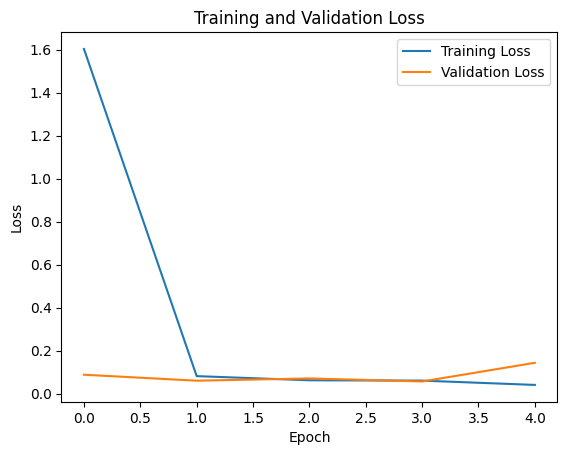

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history_googlenet.history['loss'], label='Training Loss')
plt.plot(history_googlenet.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# Visualization of performance metrics of all models

In [ ]:
all_metrics = [
    [accuracy_alexnet, precision_alexnet, recall_alexnet, f1_score_alexnet],
    [accuracy_densenet, precision_densenet, recall_densenet, f1_score_densenet],
    [accuracy_googlenet, precision_googlenet, recall_googlenet, f1_score_googlenet],
    [accuracy_vgg, precision_vgg, recall_vgg, f1_score_vgg],
    [accuracy_resnet, precision_resnet, recall_resnet, f1_score_resnet],
    [accuracy_rnn, precision_rnn, recall_rnn, f1_score_rnn]
]

In [ ]:
model_names = ['Alexnet', 'Densenet', 'Googlenet', 'VGG', 'Resnet', 'RNN']

In [ ]:
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']

In [ ]:
num_models = len(all_metrics)

In [ ]:
bar_width = 0.10
index = range(len(metrics_names))

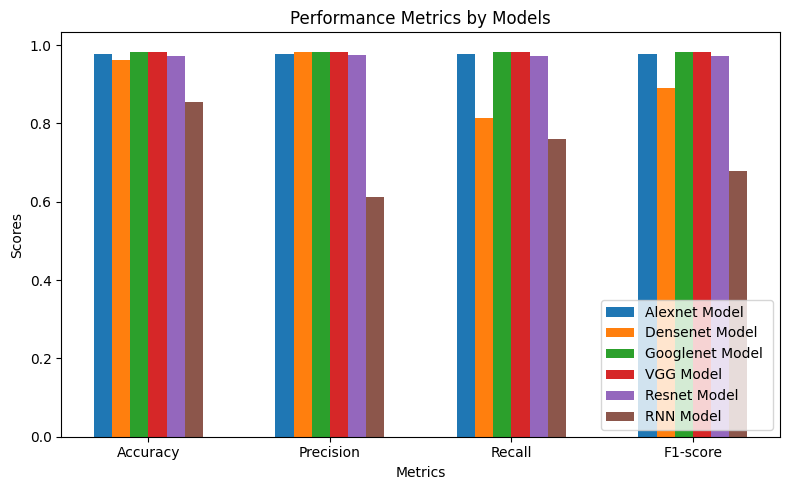

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

for i in range(num_models):
    ax.bar([p + i * bar_width for p in index], all_metrics[i], bar_width, label= model_names[i]+ ' Model ')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Models')
ax.set_xticks([p + bar_width * (num_models - 1) / 2 for p in index])
ax.set_xticklabels(metrics_names)
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()